In [4]:
# importing the dependencies
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
# Model Parameters
learning_rate = 0.001
training_epochs = 1000
display_step = 1

In [37]:
#Valores baseado em um EndID PASPIA0002
# Training Data
train_X = np.asarray([1.23,2.23,3.23,4.23,5.23,6.23,7.23,8.23,9.23,10.23,11.23])
train_y = np.asarray([372,363,377,367,381,407,381,384,396,384,381])
n_samples = train_X.shape[0]

# Test Data
test_X = np.asarray([12.23,1.24,2.24,3.24,4.24,5.24,6.24,7.24,8.24,9.24,10.24])
test_y = np.asarray([417,370,393,382,377,388,384.99,386.99,406,339.99,388.99])

In [38]:
# # Training Data
# train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
# 						7.042,10.791,5.313,7.997,5.654,9.27,3.1])
# train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
# 						2.827,3.465,1.65,2.904,2.42,2.94,1.3])
# n_samples = train_X.shape[0]

# # Test Data
# test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
# test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])


In [39]:
# Set placeholders for feature and target vectors
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

In [40]:
# Set model weights and bias
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# Construct a linear model
linear_model = W*X + b

# Mean squared error
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)

In [41]:
# Gradient descent
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch:     1 	 Cost: 6.589e+04 	 W: 2.915 	 b:0.1632
Epoch:     2 	 Cost: 6.082e+04 	 W: 5.166 	 b: 0.526
Epoch:     3 	 Cost: 5.623e+04 	 W: 7.305 	 b:0.8745
Epoch:     4 	 Cost:  5.21e+04 	 W: 9.338 	 b: 1.209
Epoch:     5 	 Cost: 4.836e+04 	 W: 11.27 	 b: 1.531
Epoch:     6 	 Cost: 4.498e+04 	 W:  13.1 	 b: 1.841
Epoch:     7 	 Cost: 4.193e+04 	 W: 14.85 	 b: 2.138
Epoch:     8 	 Cost: 3.917e+04 	 W:  16.5 	 b: 2.425
Epoch:     9 	 Cost: 3.668e+04 	 W: 18.08 	 b: 2.701
Epoch:    10 	 Cost: 3.443e+04 	 W: 19.57 	 b: 2.967
Epoch:    11 	 Cost:  3.24e+04 	 W:  21.0 	 b: 3.223
Epoch:    12 	 Cost: 3.056e+04 	 W: 22.34 	 b:  3.47
Epoch:    13 	 Cost:  2.89e+04 	 W: 23.63 	 b: 3.709
Epoch:    14 	 Cost:  2.74e+04 	 W: 24.85 	 b: 3.939
Epoch:    15 	 Cost: 2.605e+04 	 W:  26.0 	 b: 4.161
Epoch:    16 	 Cost: 2.482e+04 	 W:  27.1 	 b: 4.376
Epoch:    17 	 Cost: 2.372e+04 	 W: 28.15 	 b: 4.584
Epoch:    18 	 Cost: 2.272e+04 	 W: 29.14 	 b: 4.785
Epoch:    19 	 Cost: 2.181e+04 	 W: 30.08 	 b:

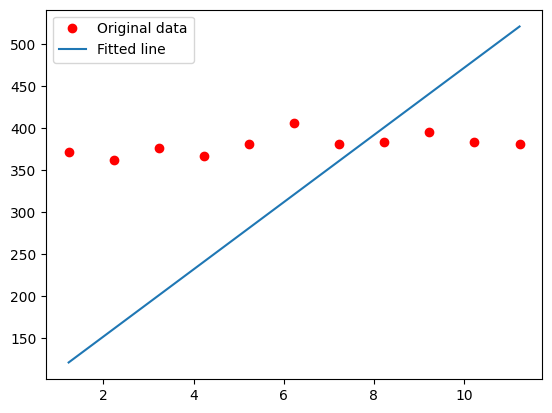

Final testing cost: 10073.407
Absolute mean square loss difference: 1014.4971


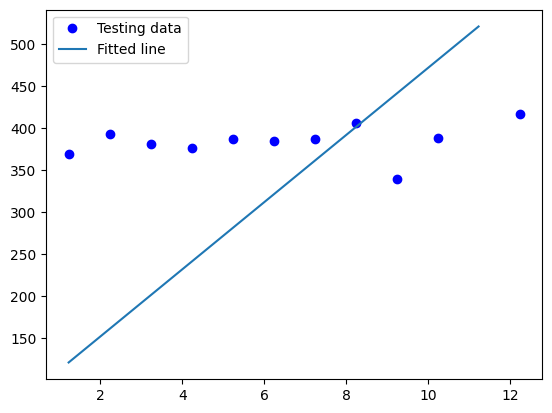

In [42]:
# Launch the graph
with tf.Session() as sess:
	# Load initialized variables in current session
	sess.run(init)

	# Fit all training data
	for epoch in range(training_epochs):

		# perform gradient descent step
		sess.run(optimizer, feed_dict={X: train_X, y: train_y})
		
		# Display logs per epoch step
		if (epoch+1) % display_step == 0:
			c = sess.run(cost, feed_dict={X: train_X, y: train_y})
			print("Epoch:{0:6} \t Cost:{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".
				format(epoch+1, c, sess.run(W), sess.run(b)))
			
	# Print final parameter values
	print("Optimization Finished!")
	training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
	print("Final training cost:", training_cost, "W:", sess.run(W), "b:", 
		sess.run(b), '\n')
	
	# Graphic display
	plt.plot(train_X, train_y, 'ro', label='Original data')
	plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
	plt.legend()
	plt.show()

	# Testing the model
	testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]),
							feed_dict={X: test_X, y: test_y})
	
	print("Final testing cost:", testing_cost)
	print("Absolute mean square loss difference:", abs(training_cost - testing_cost))

	# Display fitted line on test data
	plt.plot(test_X, test_y, 'bo', label='Testing data')
	plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
	plt.legend()
	plt.show()



Prophet Teste

           ds      y
0  2023-01-01  11520
1  2023-02-01  12400
2  2023-03-01  13040
3  2023-04-01  10640
4  2023-05-01  10640
5  2023-06-01   9280
6  2023-07-01   9280
7  2023-08-01  10719
8  2023-09-01  11360
9  2023-10-01  11920
10 2023-11-01  12880
11 2023-12-01  12880
12 2024-01-01  13440
13 2024-02-01  12000
14 2024-03-01  12320
15 2024-04-01  12160
16 2024-05-01  11840
17 2024-06-01  11120
18 2024-07-01  10080
19 2024-08-01  10480
20 2024-09-01  10080
21 2024-10-01  11520
22 2024-11-01  10960
23 2024-12-01  11629


<Axes: xlabel='ds'>

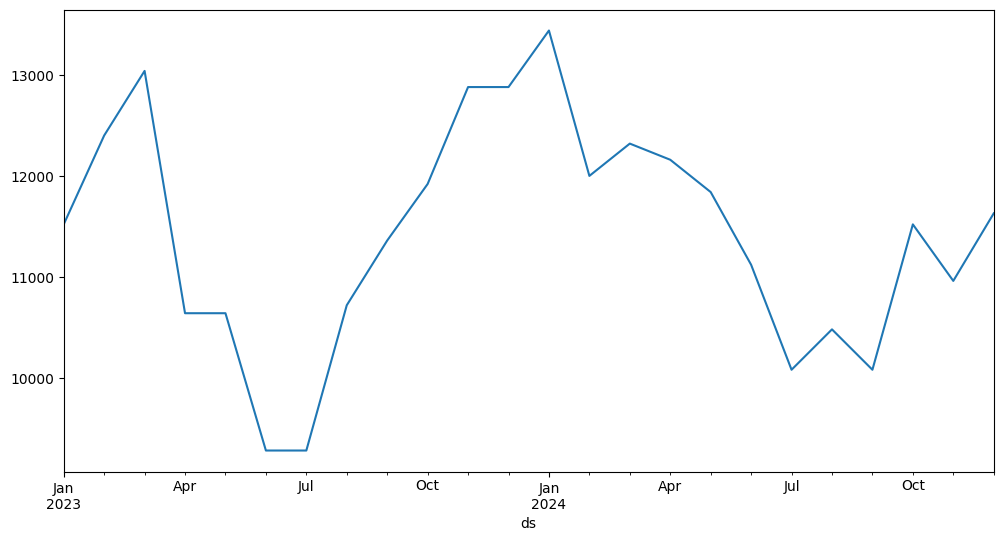

In [43]:
from prophet import Prophet
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
m = Prophet()
df = pd.read_csv('base_teste.csv')
df['Date']=pd.to_datetime(df['Date'])
df.columns = ['ds', 'y']
df.head()
print(df)
aux = df['y']
aux.index = df['ds']
aux.plot(figsize=(12, 6))

In [44]:
xtreina = df.iloc[:-12]
xteste = df.iloc[-12:]
print("treina")
print(xtreina)
print("teste")
print(xteste)

treina
           ds      y
0  2023-01-01  11520
1  2023-02-01  12400
2  2023-03-01  13040
3  2023-04-01  10640
4  2023-05-01  10640
5  2023-06-01   9280
6  2023-07-01   9280
7  2023-08-01  10719
8  2023-09-01  11360
9  2023-10-01  11920
10 2023-11-01  12880
11 2023-12-01  12880
teste
           ds      y
12 2024-01-01  13440
13 2024-02-01  12000
14 2024-03-01  12320
15 2024-04-01  12160
16 2024-05-01  11840
17 2024-06-01  11120
18 2024-07-01  10080
19 2024-08-01  10480
20 2024-09-01  10080
21 2024-10-01  11520
22 2024-11-01  10960
23 2024-12-01  11629


Prophet exemplo

17:22:44 - cmdstanpy - INFO - Chain [1] start processing
17:22:44 - cmdstanpy - INFO - Chain [1] done processing


           ds         trend    yhat_lower    yhat_upper   trend_lower  \
0  2024-01-01  11746.296897  10133.596229  13299.754630  11746.289478   
1  2024-02-01  11803.321537  10108.811136  13349.361188  11803.296934   
2  2024-03-01  11856.667168  10338.646701  13427.064820  11856.616199   
3  2024-04-01  11913.691808  10200.947267  13374.739180  11913.613908   
4  2024-05-01  11968.876943  10510.874360  13603.420346  11968.775411   
5  2024-06-01  12025.901583  10434.603128  13714.370824  12025.770806   
6  2024-07-01  12081.086719  10468.763695  13635.661538  12080.919796   
7  2024-08-01  12138.111358  10487.664305  13685.467240  12137.913159   
8  2024-09-01  12195.135998  10549.653432  13743.698716  12194.893900   
9  2024-10-01  12250.321134  10706.971987  13979.610948  12250.051938   
10 2024-11-01  12307.345773  10696.474308  13850.311591  12307.036472   
11 2024-12-01  12362.530909  10641.201145  13926.605458  12362.169169   

     trend_upper  additive_terms  additive_terms_l

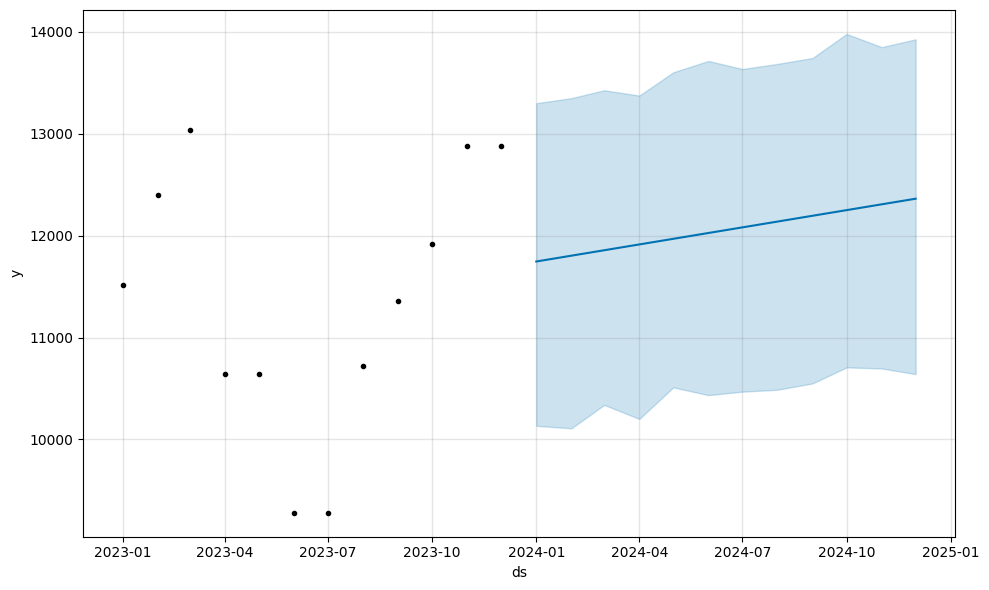

In [98]:
df.set_index('ds').plot
m = Prophet().fit(xtreina)
future = m.make_future_dataframe(periods=360,include_history = False)
yresp=m.predict(xteste)
m.plot(yresp)
print(yresp)
# tabelaAnalise[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
# fig1 = m.plot(tabelaAnalise)
# Tabnova = tabelaAnalise['trend']
# Tabnova.index = tabelaAnalise["ds"]
# Tabnova=Tabnova.resample("ME").sum()
# print(Tabnova)
# Tabnova.plot(figsize=(12, 6))
# Tabnova = tabelaAnalise[['ds','yhat_lower']].copy()


In [ ]:
from neuralprophet import NeuralProphet, set_log_level
import pandas as pd

set_log_level("ERROR")

df = pd.read_csv('base_teste.csv')

df =df.rename(columns={'Date':'ds','Production': 'y'}) 
df['ds']=pd.DatetimeIndex(df['ds'])
df.head()
# df.index = df['ds']
# df = df.drop(columns=['ds'])
# print(df)

m = NeuralProphet(epochs=500, 
        learning_rate=0.05, 
        normalize="auto",
        n_changepoints=0,
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=True,
        seasonality_mode="additive",
        loss_func="MSE")

df_train, df_val = m.split_df(df, valid_p = 0.2)

metrics = m.fit(df_train, validation_df=df_val, progress="plot-all")
metrics.head(10)

future = m.make_future_dataframe(df,periods=12, n_historic_predictions=len(df))

forecast = m.predict(future)

forecast

# forecast.plot(figsize=(12, 6))

m.plot(forecast)

: 

Text(0.5, 1.0, 'Model Loss')

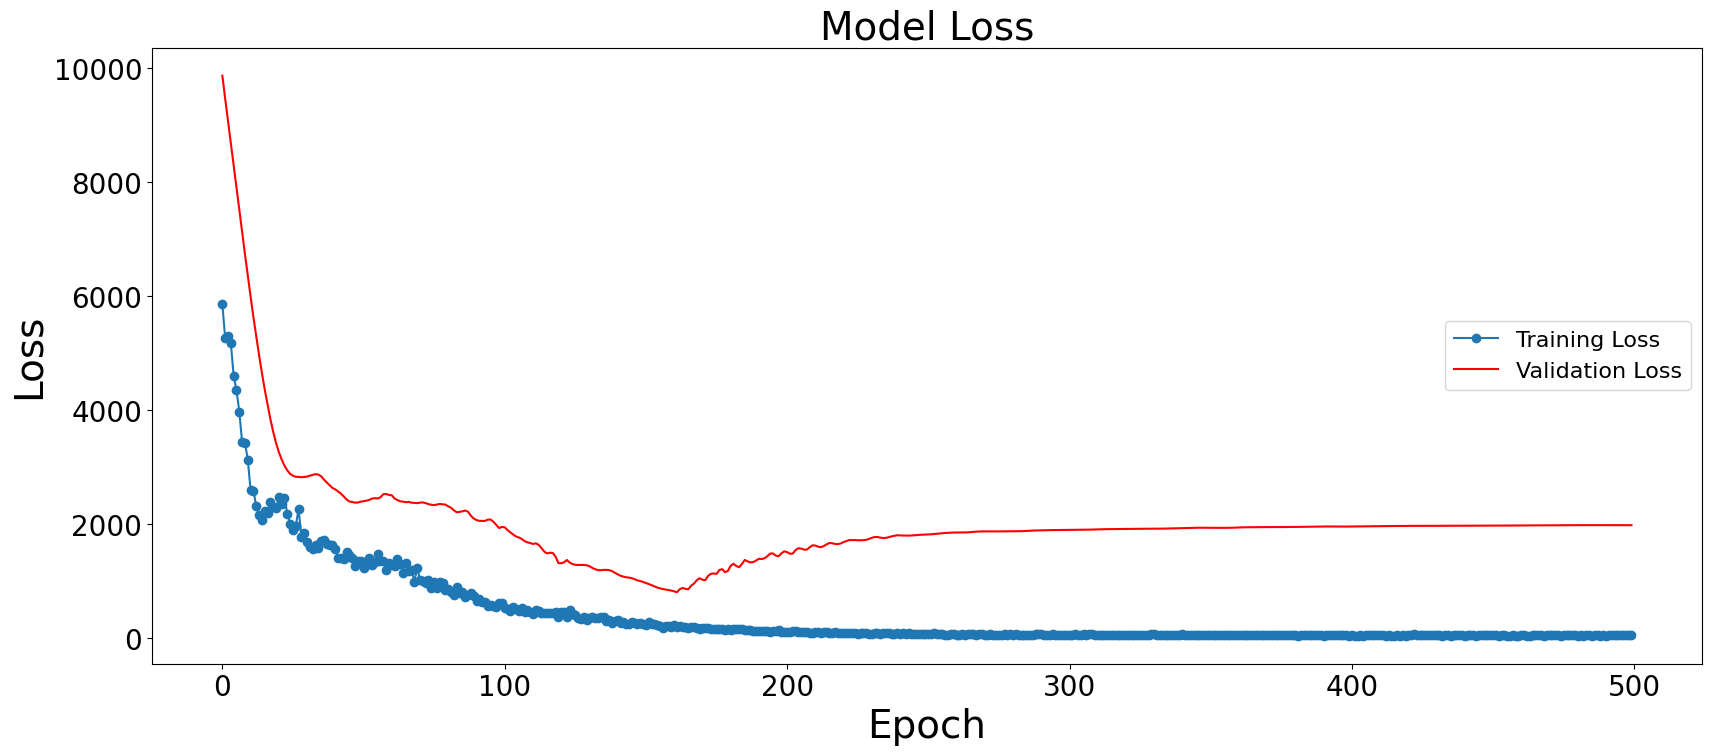

In [112]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss", fontsize=28)